# Notebook 1
This is the main Google Colab notebook for analysis.

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


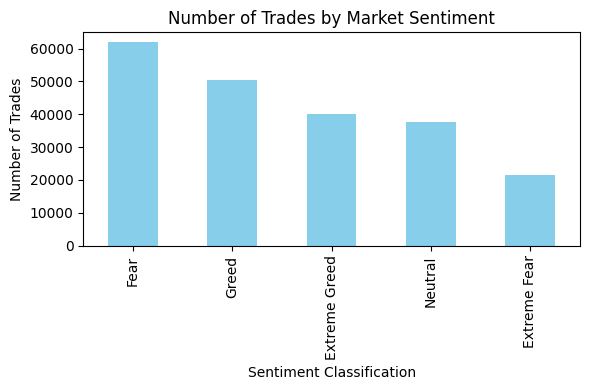

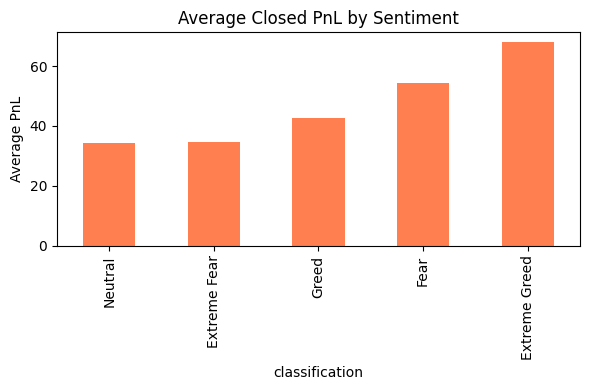

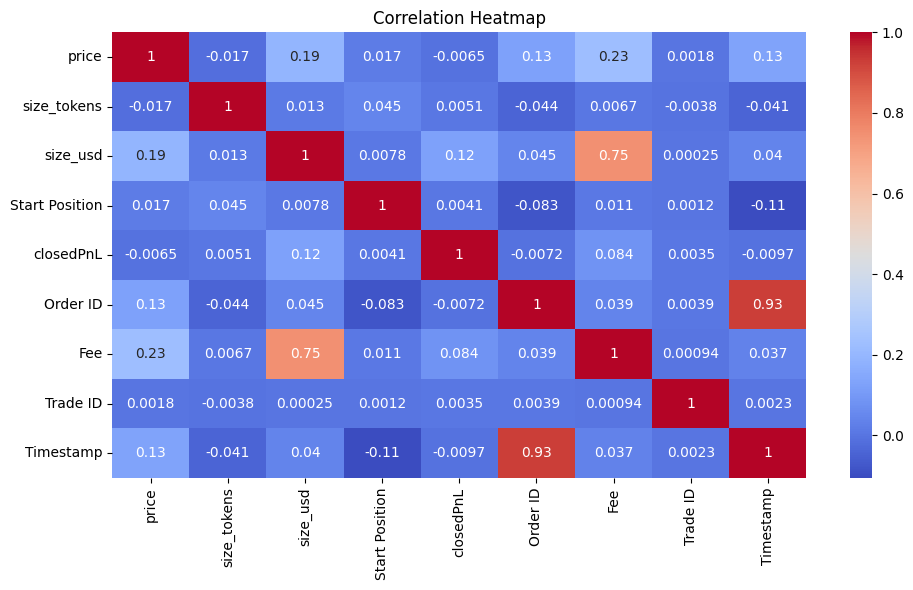

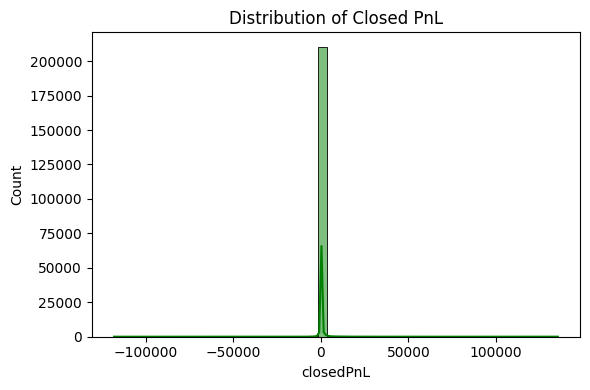

✅ Analysis complete! All plots saved in `outputs/` folder.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create outputs directory if not exists
os.makedirs("outputs", exist_ok=True)

# 1. Load Data
fear_greed = pd.read_csv("csv_files/fear_greed_index.csv")
trader_data = pd.read_csv("csv_files/historical_data.csv")

# 2. Inspect Data (Optional)
display(fear_greed.head())
display(trader_data.head())

# 3. Rename Columns
trader_data.rename(columns={
    'Account': 'account',
    'Coin': 'coin',
    'Execution Price': 'price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Timestamp IST': 'time',
    'Closed PnL': 'closedPnL',
}, inplace=True)

# 4. Convert timestamps
trader_data['time'] = pd.to_datetime(trader_data['time'], format='%d-%m-%Y %H:%M')
fear_greed['Date'] = pd.to_datetime(fear_greed['date'], errors='coerce')

# 5. Create `date` column to merge
trader_data['date'] = trader_data['time'].dt.date
fear_greed['date'] = fear_greed['Date'].dt.date

# 6. Merge Datasets on Date
merged_df = pd.merge(trader_data, fear_greed[['date', 'classification']], on='date', how='left')

# 7. Save merged file (Optional)
merged_df.to_csv("csv_files/merged_data.csv", index=False)

# 8. Plot: Number of Trades by Sentiment
plt.figure(figsize=(6, 4))
merged_df['classification'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Sentiment Classification")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig("outputs/trades_by_sentiment.png")
plt.show()

# 9. Average PnL per Sentiment
avg_pnl = merged_df.groupby('classification')['closedPnL'].mean().sort_values()
plt.figure(figsize=(6, 4))
avg_pnl.plot(kind='bar', color='coral')
plt.title("Average Closed PnL by Sentiment")
plt.ylabel("Average PnL")
plt.tight_layout()
plt.savefig("outputs/avg_pnl_by_sentiment.png")
plt.show()

# 10. Correlation Heatmap
numeric_cols = merged_df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("outputs/correlation_heatmap.png")
plt.show()

# 11. Distribution of Closed PnL
plt.figure(figsize=(6, 4))
sns.histplot(merged_df['closedPnL'], kde=True, bins=50, color='green')
plt.title("Distribution of Closed PnL")
plt.tight_layout()
plt.savefig("outputs/closed_pnl_distribution.png")
plt.show()

# ✅ Summary
print("✅ Analysis complete! All plots saved in `outputs/` folder.")
